In [1]:
import pm4py

In [2]:
log = pm4py.read_xes('../data/running-example.xes')
log

/Users/bedong/Workspaces/GitHub/pm4py-test/venv/lib/python3.10/site-packages/pm4py/util/dt_parsing/parser.py:76: UserWarning: ISO8601 strings are not fully supported with strpfromiso for Python versions below 3.11
  warnings.warn(


parsing log, completed traces ::   0%|          | 0/6 [00:00<?, ?it/s]

/Users/bedong/Workspaces/GitHub/pm4py-test/venv/lib/python3.10/site-packages/pm4py/objects/log/util/dataframe_utils.py:176: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col] = pd.to_datetime(df[col], utc=True)
/Users/bedong/Workspaces/GitHub/pm4py-test/venv/lib/python3.10/site-packages/pm4py/objects/log/util/dataframe_utils.py:176: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col] = pd.to_datetime(df[col], utc=True)
/Users/bedong/Workspaces/GitHub/pm4py-test/venv/lib/python3.10/site-packages/pm4py/objects/log/util/dataframe_utils.py:176: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please sp

,concept:name,time:timestamp,cost:total,org:resource,@@index,case:concept:name
0,register request,2010-12-30 10:02:00+00:00,50,Pete,14,1
1,examine thoroughly,2010-12-31 09:06:00+00:00,400,Sue,15,1
2,check ticket,2011-01-05 14:12:00+00:00,100,Mike,16,1
3,decide,2011-01-06 10:18:00+00:00,200,Sara,17,1
4,reject request,2011-01-07 13:24:00+00:00,200,Pete,18,1
5,register request,2010-12-30 10:32:00+00:00,50,Mike,9,2
6,check ticket,2010-12-30 11:12:00+00:00,100,Mike,10,2
7,examine casually,2010-12-30 13:16:00+00:00,400,Sean,11,2
8,decide,2011-01-05 10:22:00+00:00,200,Sara,12,2
9,pay compensation,2011-01-08 11:05:00+00:00,200,Ellen,13,2


In [3]:
process_tree = pm4py.discover_process_tree_inductive(log)
process_tree

->( 'register request', *( ->( +( 'check ticket', X( 'examine thoroughly', 'examine casually' ) ), 'decide' ), 'reinitiate request' ), X( 'reject request', 'pay compensation' ) )

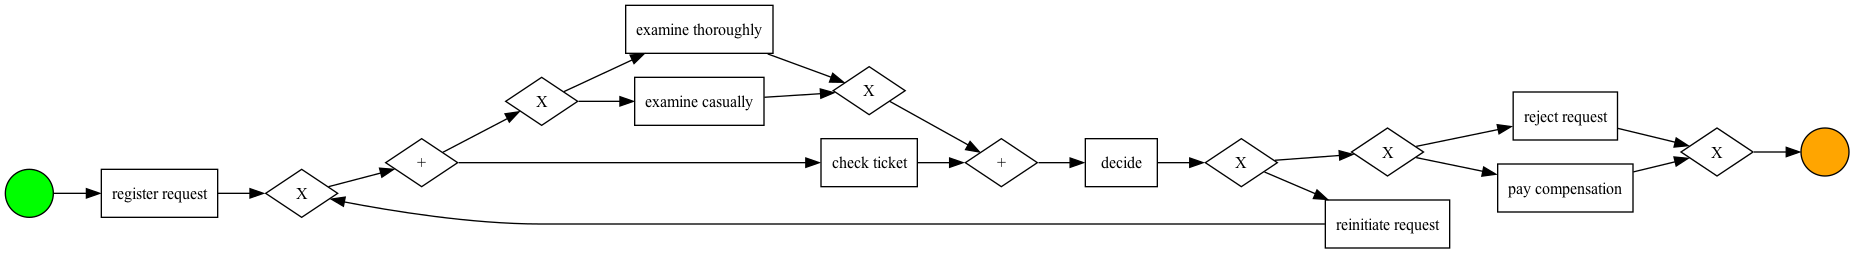

In [6]:
bpmn_model = pm4py.convert_to_bpmn(process_tree)
pm4py.view_bpmn(bpmn_model)